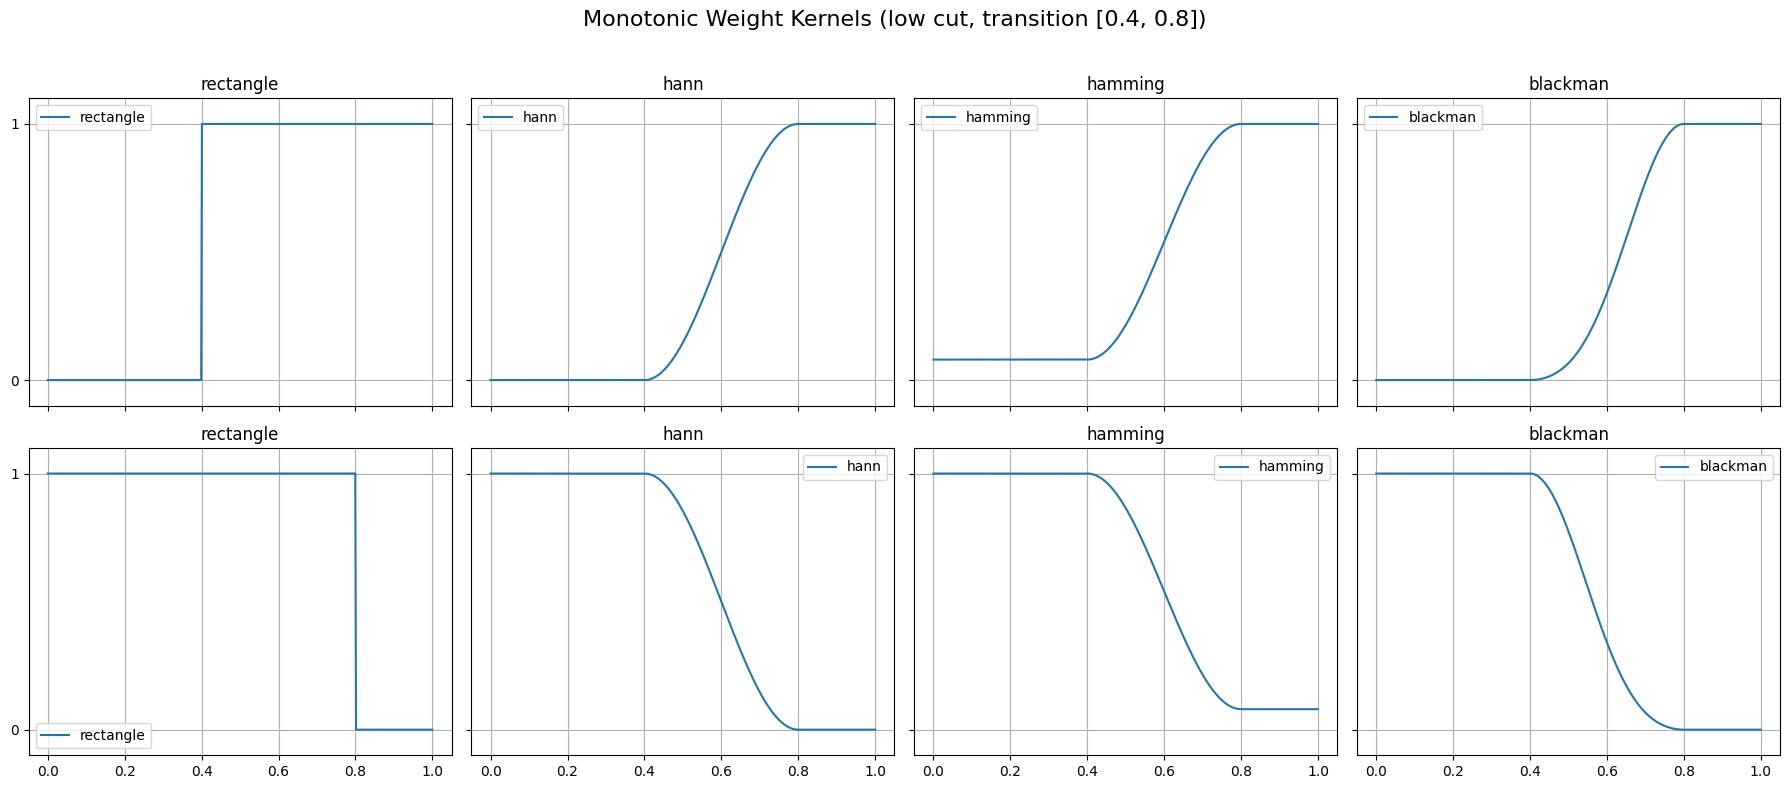

<Figure size 640x480 with 0 Axes>

In [1]:

    import matplotlib.pyplot as plt
    import numpy as np
    
    from mt_metadata.features.weights.monotonic_weight_kernel import TaperMonotonicWeightKernel
    from mt_metadata.features.weights.monotonic_weight_kernel import ActivationMonotonicWeightKernel

    # Define the kernel styles to visualize
    taper_kernel_styles = [
        "rectangle", "hann", "hamming", "blackman",
    ]
    activation_kernel_styles = [
        "sigmoid", "hard_sigmoid", "tanh", "hard_tanh"
    ]

    # Define the transition region
    lb = 0.4
    ub = 0.8
    x = np.linspace(0, 1, 500)

    fig, axs = plt.subplots(2, 4, figsize=(18, 8), sharex=True, sharey=True)
    axs = axs.flatten()

    for i, threshold in enumerate(["low cut", "high cut"]):
        for j, style in enumerate(taper_kernel_styles):
            kernel = TaperMonotonicWeightKernel()
            kernel.from_dict(
                {
                "transition_lower_bound":lb,
                "transition_upper_bound":ub,
                "half_window_style":style,
                "style":"taper",
                "threshold": threshold,
                }
            )
            y = kernel.evaluate(x)
            axs[i*4+j].plot(x, y, label=style)
            axs[i*4+j].set_title(style)
            axs[i*4+j].set_ylim(-0.1, 1.1)
            axs[i*4+j].set_yticks([0, 1])  # Show 0 and 1 on all y-axes
            axs[i*4+j].grid(True)
            axs[i*4+j].legend()

    fig.suptitle("Monotonic Weight Kernels (low cut, transition [{}, {}])".format(lb, ub), fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    plt.clf()



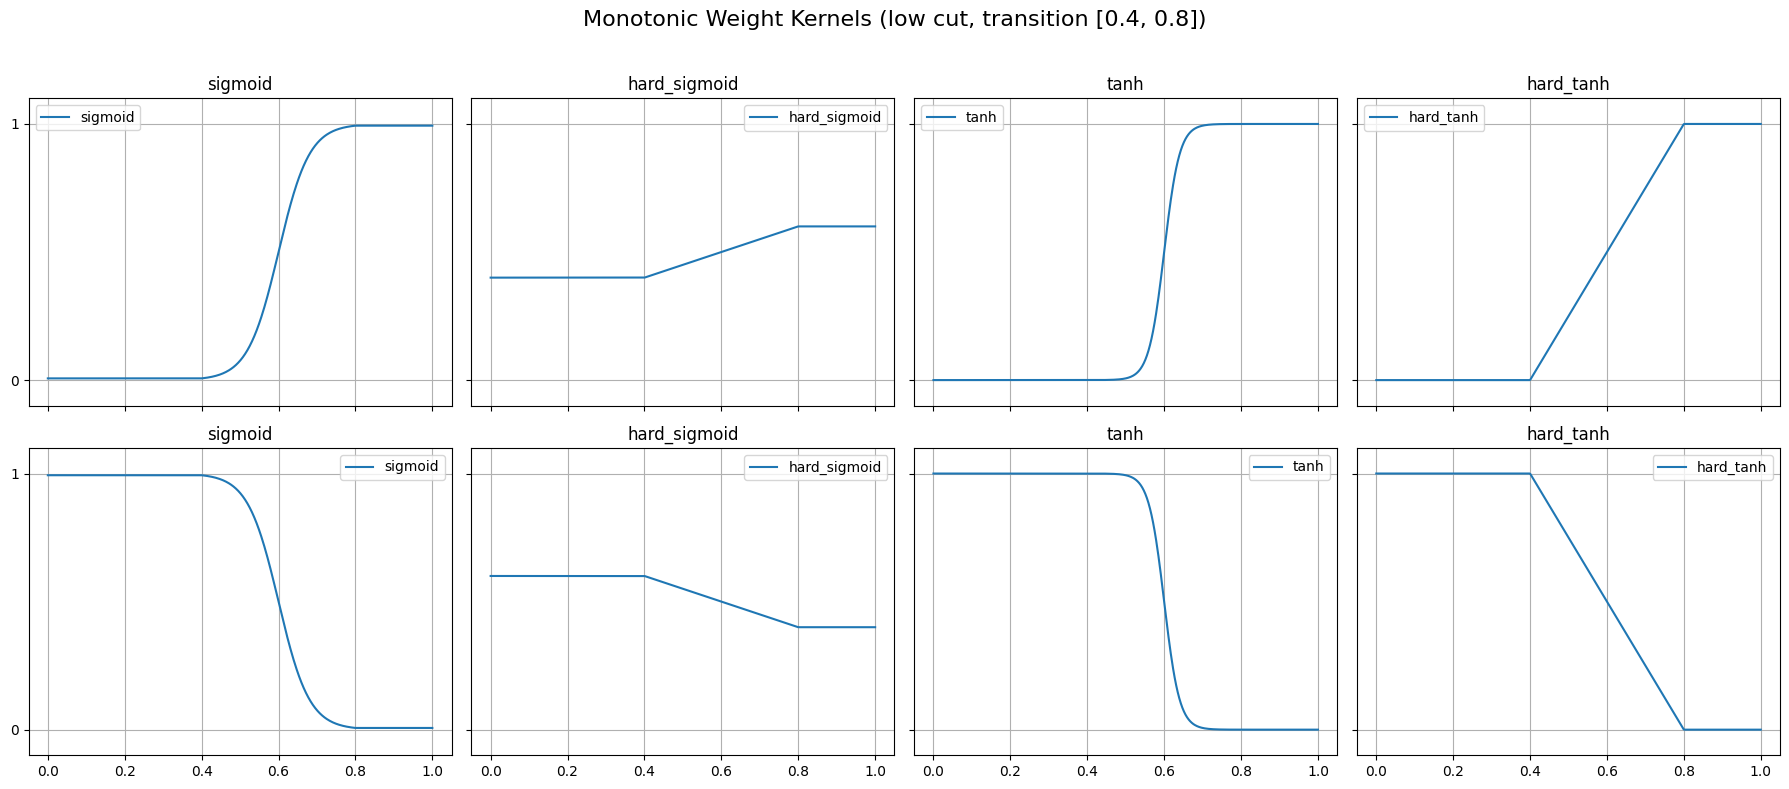

In [2]:
    fig, axs = plt.subplots(2, 4, figsize=(18, 8), sharex=True, sharey=True)
    axs = axs.flatten()
    
    for i, threshold in enumerate(["low cut", "high cut"]):
        for j, style in enumerate(activation_kernel_styles):
            kernel = ActivationMonotonicWeightKernel()
            kernel.from_dict(
                {
                    "transition_lower_bound":lb,
                    "transition_upper_bound":ub,
                    "activation_style":style,
                    "style":"activation",
                    "steepness": 10,
                    "threshold":threshold
                }
            )
            y = kernel.evaluate(x)
            axs[i*4+j].plot(x, y, label=style)
            axs[i*4+j].set_title(style)
            axs[i*4+j].set_ylim(-0.1, 1.1)
            axs[i*4+j].set_yticks([0, 1])  # Show 0 and 1 on all y-axes
            axs[i*4+j].grid(True)
            axs[i*4+j].legend()
        
    fig.suptitle("Monotonic Weight Kernels (low cut, transition [{}, {}])".format(lb, ub), fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
